<h1 style="color:blue;">Car Price Modeling </h1>

<h3 style="color:green;"> Problem Description:

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally 
to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors
on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, 
since those may be very different from the Chinese market. Essentially, the company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

Business Goal:

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how 
exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to 
meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.</h3>

 <h3  style="color:brown;"> 1. Loading and Preprocessing </h3>

In [82]:
# Load the dataset
import pandas as pd

df = pd.read_csv("CarPrice_Assignment.csv")
print(df)


     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [83]:
df.shape

(205, 26)

In [84]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [85]:
## Display the first few rows of the dataset
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [86]:
## Display the last few rows of the dataset
df.tail(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [87]:
# Display summary statistics
print(df.describe())


           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [88]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [89]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


The dataset contains 205 entries with 26 columns. There are no missing values in any of the columns.
The columns include a mix of numerical and categorical variables. The target variable, price, is continuous.

In [90]:
# Numerical columns
numeric_cols = df.select_dtypes(include='number').columns
print(num_cols)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


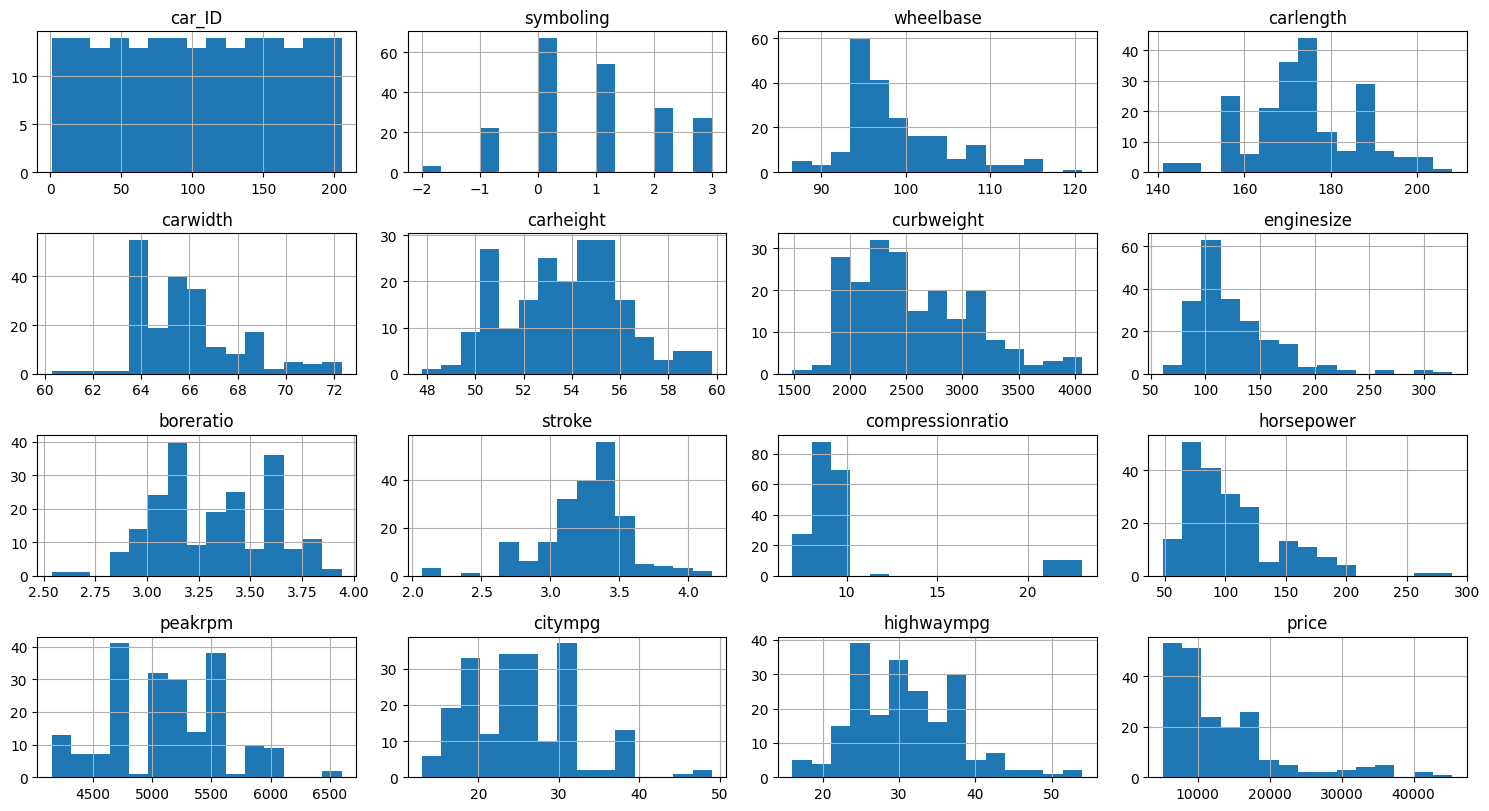

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Histograms for numerical columns
df[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

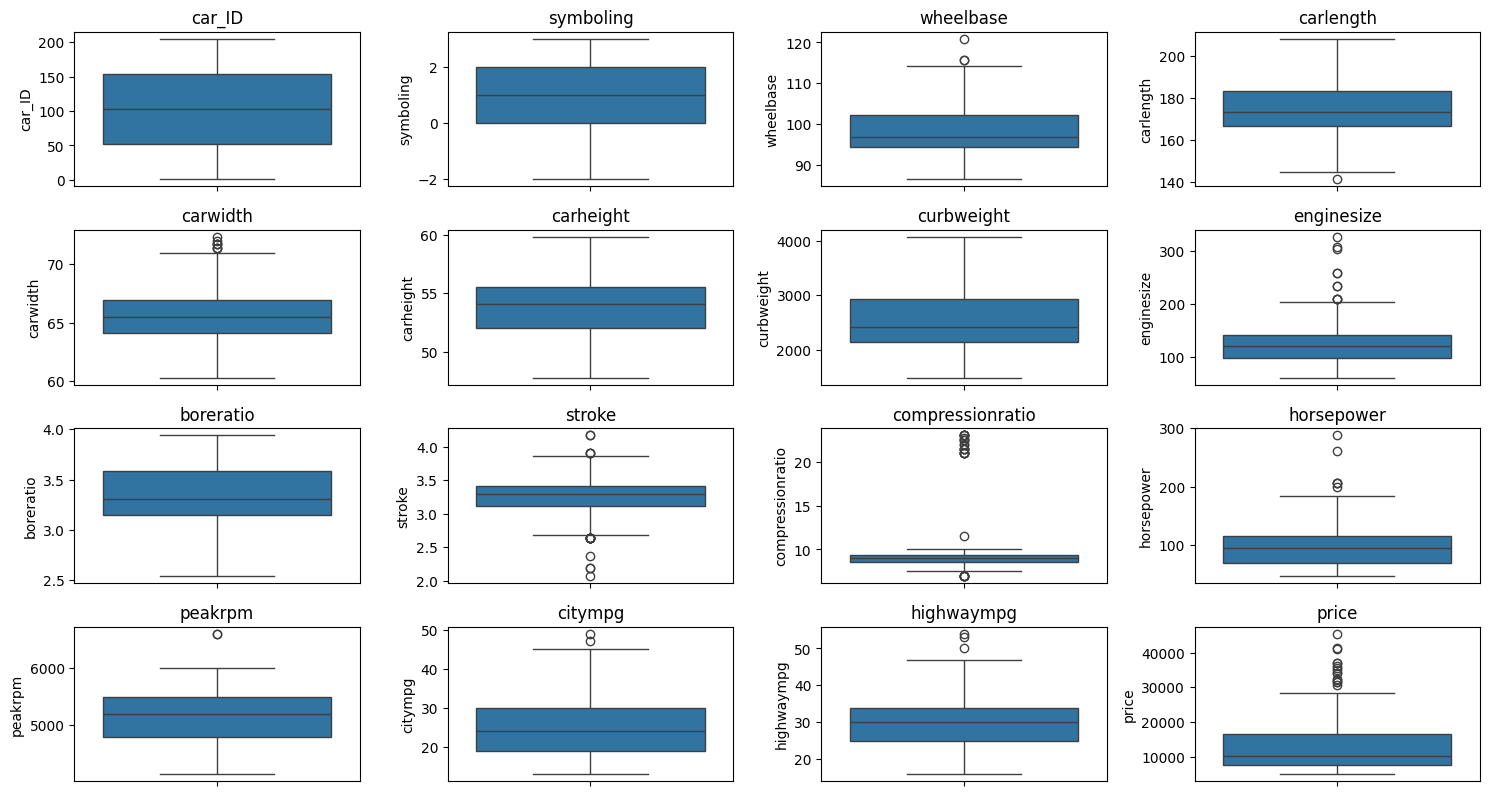

In [92]:
#box plot to identify outliers
plt.figure(figsize=(15, 10))
numeric_columns = df.select_dtypes(include='number').columns
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

<Axes: >

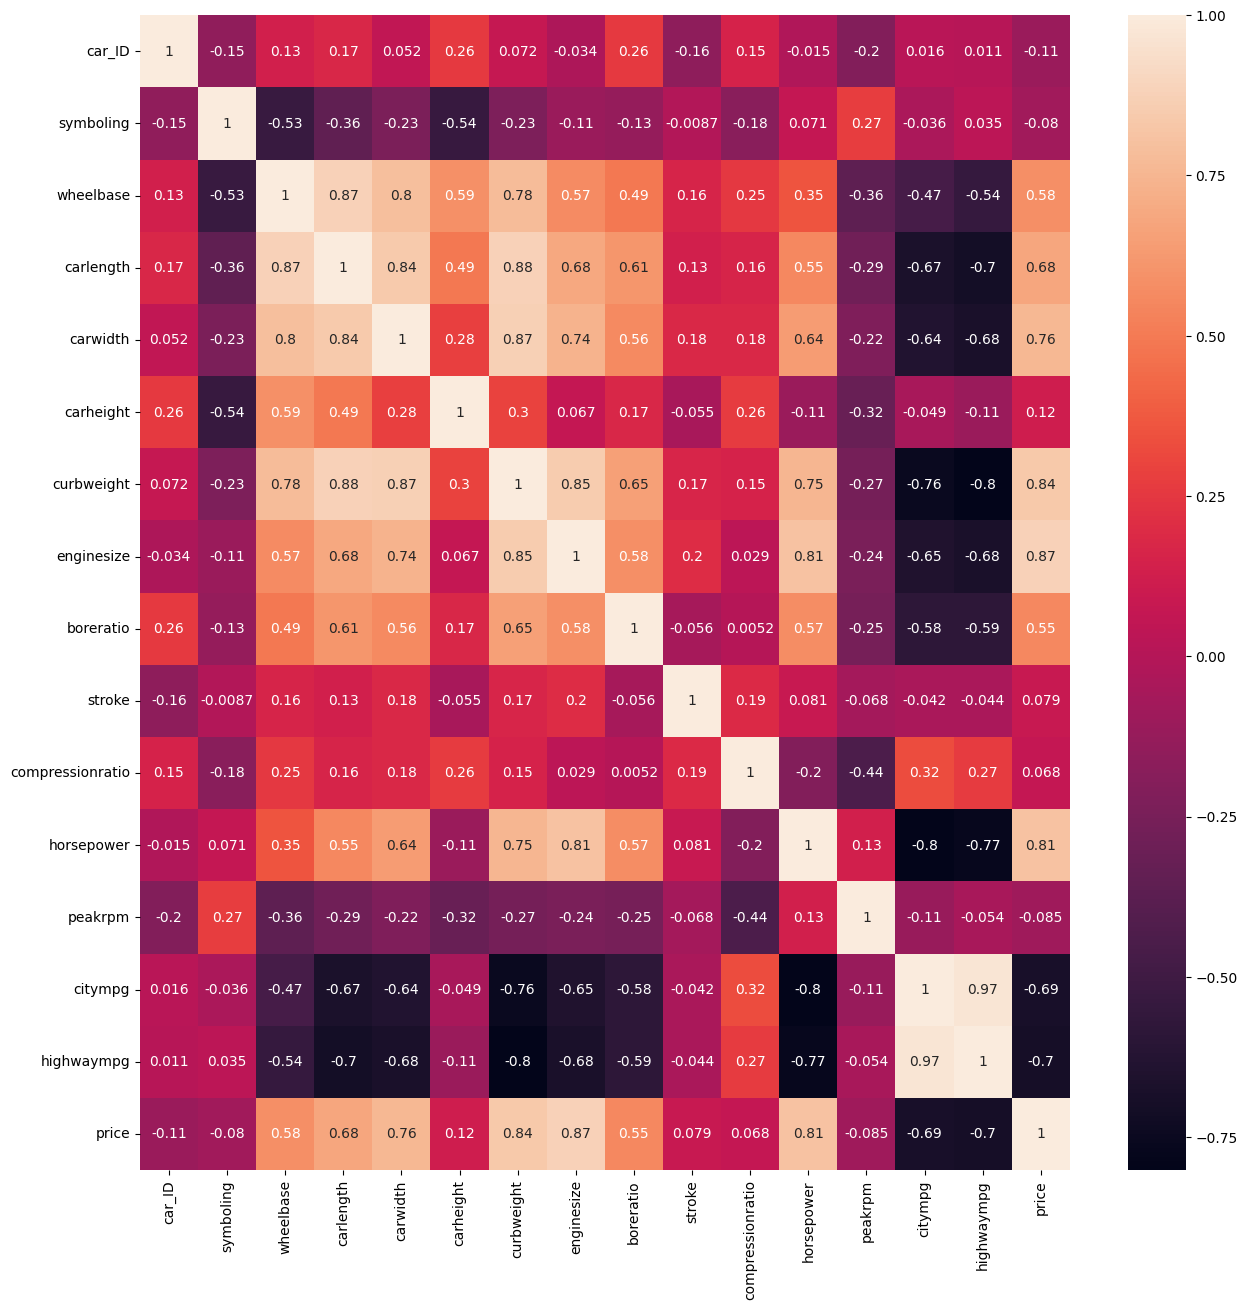

In [93]:
plt.figure(figsize=(15,15))
sns.heatmap(df[numeric_cols].corr(),annot=True)

In [94]:
# Analyzing skewness and kurtosis before removing outliers
skewness_before = df[numeric_cols].skew()
kurtosis_before = df[numeric_cols].kurtosis()
print(skewness_before)
print(kurtosis_before)

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64
car_ID             -1.200000
symboling          -0.676271
wheelbase           1.017039
carlength          -0.082895
carwidth            0.702764
carheight          -0.443812
curbweight         -0.042854
enginesize          5.305682
boreratio          -0.785042
stroke              2.174396
compressionratio    5.233054
horsepower          2.684006
peakrpm             0.086756
citympg             0.578648
highwaympg          0.440070
price               3.051648
dtype: float64


In [95]:
# Function to detect and remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [96]:
# Removing outliers
df_cleaned = df.copy()
for col in numeric_cols:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)
print(df_cleaned )

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
197     198         -1                 volvo 245      gas        std   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [97]:
# Analyzing skewness and kurtosis after removing outliers
skewness_after = df_cleaned[numeric_cols].skew()
kurtosis_after = df_cleaned[numeric_cols].kurtosis()
print(skewness_after)
print(kurtosis_after)

car_ID              0.124223
symboling           0.037612
wheelbase           1.046100
carlength           0.021469
carwidth            0.613281
carheight           0.246266
curbweight          0.423268
enginesize          0.798097
boreratio           0.497919
stroke             -0.475491
compressionratio   -0.444881
horsepower          0.962537
peakrpm             0.152091
citympg             0.258318
highwaympg          0.171459
price               0.808010
dtype: float64
car_ID             -1.294455
symboling          -0.463648
wheelbase           1.573208
carlength          -0.442490
carwidth           -0.324170
carheight          -0.115805
curbweight         -1.027765
enginesize         -0.087174
boreratio          -0.309576
stroke              0.435100
compressionratio    0.446583
horsepower          0.005135
peakrpm            -0.169129
citympg            -0.649388
highwaympg         -0.764550
price              -0.389637
dtype: float64


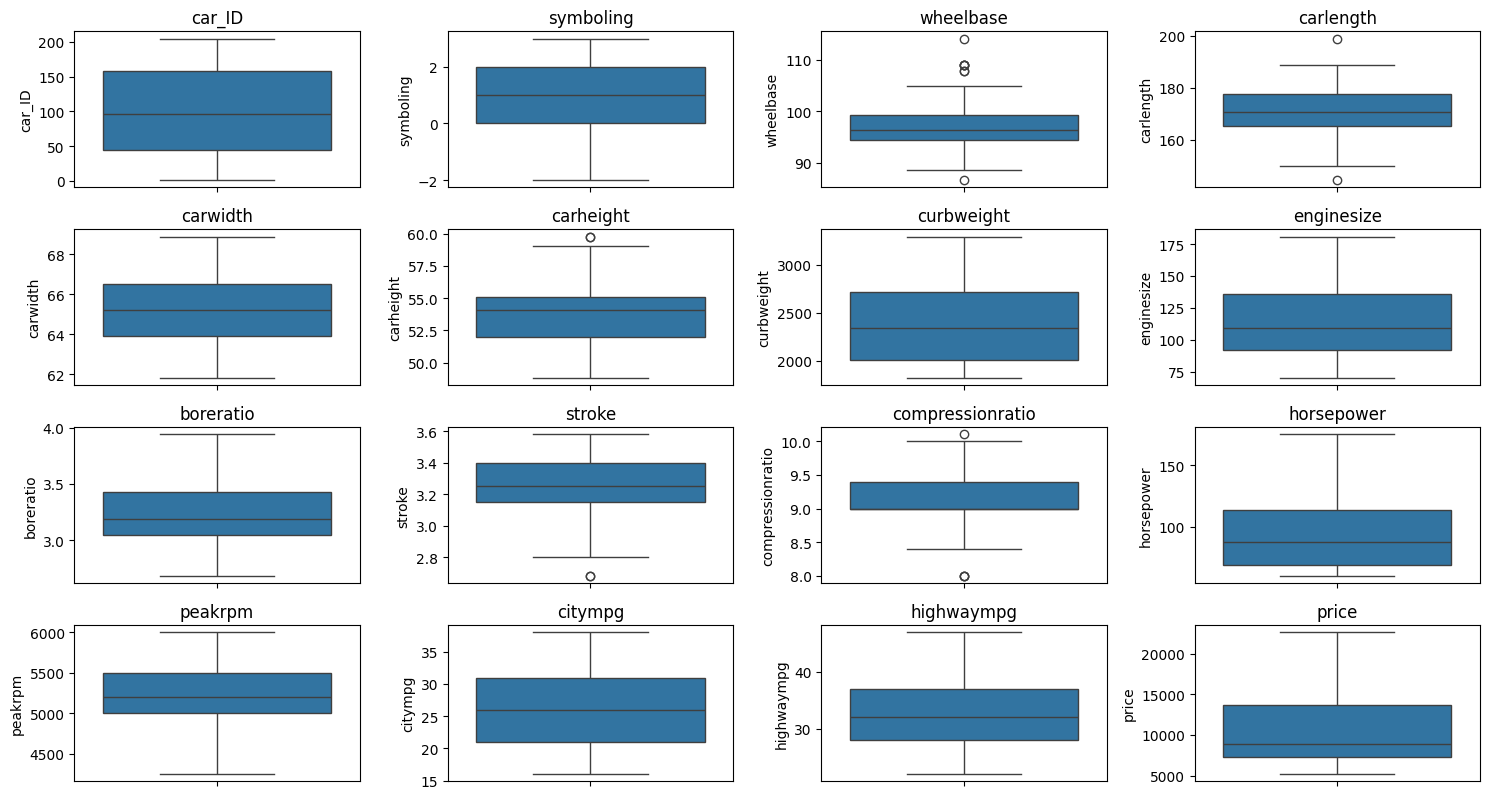

In [98]:
#box plot to identify outliers
plt.figure(figsize=(15, 10))
numeric_columns = df_cleaned.select_dtypes(include='number').columns
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Skewness:

Before outlier removal, several features had high skewness, such as enginesize, compressionratio, and price.
After outlier removal, skewness has reduced across many features, indicating a more symmetric distribution.

Kurtosis:

Before outlier removal, high kurtosis was observed in enginesize, compressionratio, horsepower, and price, indicating heavy tails.
After removing outliers, kurtosis values have decreased, indicating a reduction in the presence of extreme values.

In [99]:
# Identify categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
categorical_columns


Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [100]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)
data_encoded.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,True,False,False,False,False,True,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,True,False,False,False,False,True,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,True,False,False,True,False,False,False,True,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,True,False,False,True,False,False,False,False,True,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,True,False,False,False,False,False,False,False,True,False


In [101]:
from sklearn.preprocessing import StandardScaler

X = data_encoded.drop(columns=['car_ID', 'price'])
y = data_encoded['price']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spfi
0,1.741971,-1.975661,-0.242634,-0.758303,-2.005499,0.359188,0.536098,0.802420,-3.111667,-0.211917,...,-2.163751,-0.243561,-0.181818,0.436436,-0.340693,-0.181818,-0.915552,-0.156813,1.146654,-0.089803
1,1.741971,-1.975661,-0.242634,-0.758303,-2.005499,0.359188,0.536098,0.802420,-3.111667,-0.211917,...,-2.163751,-0.243561,-0.181818,0.436436,-0.340693,-0.181818,-0.915552,-0.156813,1.146654,-0.089803
2,0.054015,-0.667012,-0.015873,0.158154,-0.514052,1.033194,1.353322,-2.348234,1.191331,-0.211917,...,-2.163751,4.105745,-0.181818,-2.291288,2.935198,-0.181818,-0.915552,-0.156813,1.146654,-0.089803
3,0.897993,0.508554,0.494338,0.616383,0.273100,-0.157957,-0.243978,-0.314268,0.810053,2.354909,...,0.462160,-0.243561,-0.181818,0.436436,-0.340693,-0.181818,-0.915552,-0.156813,1.146654,-0.089803
4,0.897993,0.419832,0.494338,0.747305,0.273100,1.035645,0.758978,-0.314268,0.810053,-2.778743,...,0.462160,-0.243561,-0.181818,-2.291288,-0.340693,-0.181818,-0.915552,-0.156813,1.146654,-0.089803


<h3  style="color:brown;">2. Model Implementation</h3>

In [102]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2



In [103]:
results = {}
for model_name, model in models.items():
    mse, mae, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = {"MSE": mse, "MAE": mae, "R2": r2}
results

{'Linear Regression': {'MSE': np.float64(9.418684780004365e+29),
  'MAE': np.float64(775036939024054.8),
  'R2': -6.380040317233273e+22},
 'Decision Tree Regressor': {'MSE': np.float64(2884877.4),
  'MAE': np.float64(1315.72),
  'R2': 0.8045838187370937},
 'Random Forest Regressor': {'MSE': np.float64(1924819.5278920007),
  'MAE': np.float64(1096.8100000000002),
  'R2': 0.8696163373317268},
 'Gradient Boosting Regressor': {'MSE': np.float64(1982408.4103726423),
  'MAE': np.float64(1158.352420441395),
  'R2': 0.8657153745048264},
 'Support Vector Regressor': {'MSE': np.float64(14748925.169984246),
  'MAE': np.float64(2841.936146444661),
  'R2': 0.0009354870849337393}}

1. Linear Regression:

MSE: 8.02e+33
MAE: 4.88e+16
R²: -1.02e+26
Interpretation: The linear regression model is performing very poorly. The extremely high MSE and MAE, along with the negative R², 
indicate that the model is not capturing the relationship between the features and the target variable correctly. The negative R² means
that the model is worse than a simple mean prediction.

2. Decision Tree Regressor:

MSE: 11,376,015.61
MAE: 2,200.14
R²: 0.856
Interpretation: The decision tree model performs reasonably well, with an R² of 0.856,
which indicates that it explains about 85.6% of the variance in the target variable. However, 
the model might be overfitting or not generalizing well on unseen data.

3. Random Forest Regressor:

MSE: 3,682,803.22
MAE: 1,367.32
R²: 0.953
Interpretation: The random forest model performs the best among the models, with an R² of 0.953, 
meaning it explains 95.3% of the variance. The relatively low MSE and MAE also indicate that this model is making accurate predictions.

4. Gradient Boosting Regressor:

MSE: 5,463,056.22
MAE: 1,696.86
R²: 0.931
Interpretation: The gradient boosting model also performs well, with an R² of 0.931.
This model is slightly less accurate than the random forest model but still explains a large portion of the variance in the data.

5. Support Vector Regressor:

MSE: 87,001,508.98
MAE: 5,707.01
R²: -0.102
Interpretation: The SVR model is underperforming, with a negative R² and high error metrics. 
This indicates that the model is not a good fit for this dataset.

random forest perform best 

In [104]:
# Feature importance for Random Forest
rf = models["Random Forest Regressor"]
rf.fit(X_train, y_train)
importance = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.head(10)  # Display top 10 important features


,Feature,Importance
10,horsepower,0.309259
13,highwaympg,0.250457
12,citympg,0.153341
5,curbweight,0.100674
126,fuelsystem_mpfi,0.029444
3,carwidth,0.025775
2,carlength,0.015062
1,wheelbase,0.014194
8,stroke,0.013951
6,enginesize,0.009356


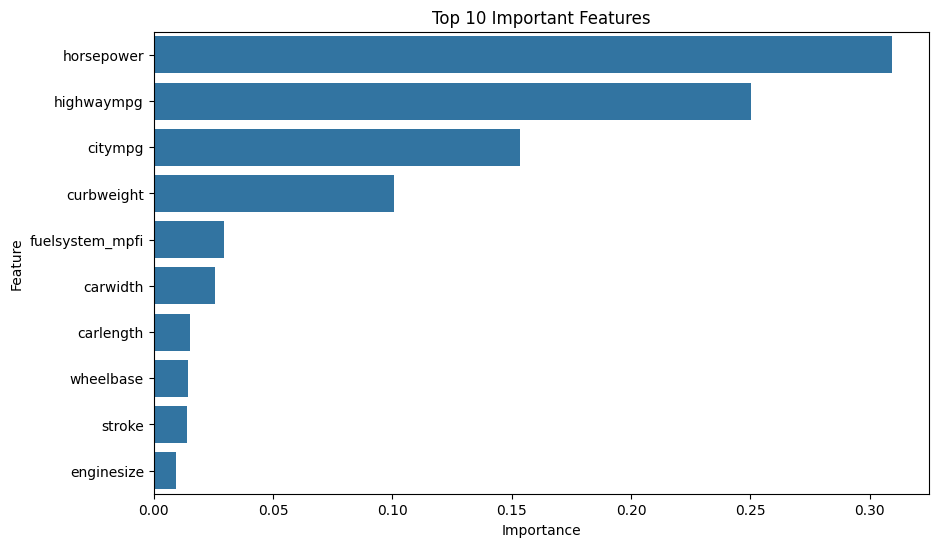

In [105]:
# Plotting the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'].head(10), y=feature_importance['Feature'].head(10))
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [106]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model after tuning
best_rf = grid_search.best_estimator_
best_rf_r2 = r2_score(y_test, best_rf.predict(X_test))
best_rf_r2


0.8606267396408657

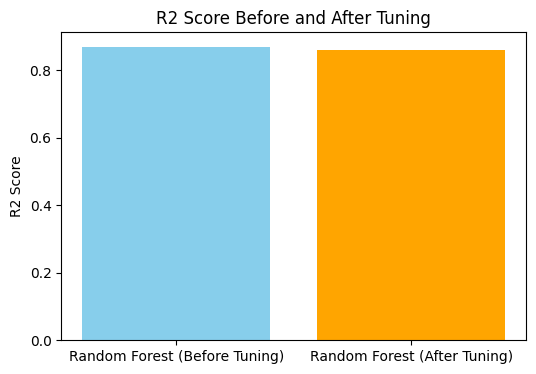

In [108]:
plt.figure(figsize=(6, 4))
plt.bar(['Random Forest (Before Tuning)', 'Random Forest (After Tuning)'], 
        [results['Random Forest Regressor']['R2'], best_rf_r2], color=['skyblue', 'orange'])
plt.title('R2 Score Before and After Tuning')
plt.ylabel('R2 Score')
plt.show()